# Filling the missing data by using predictive methods

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


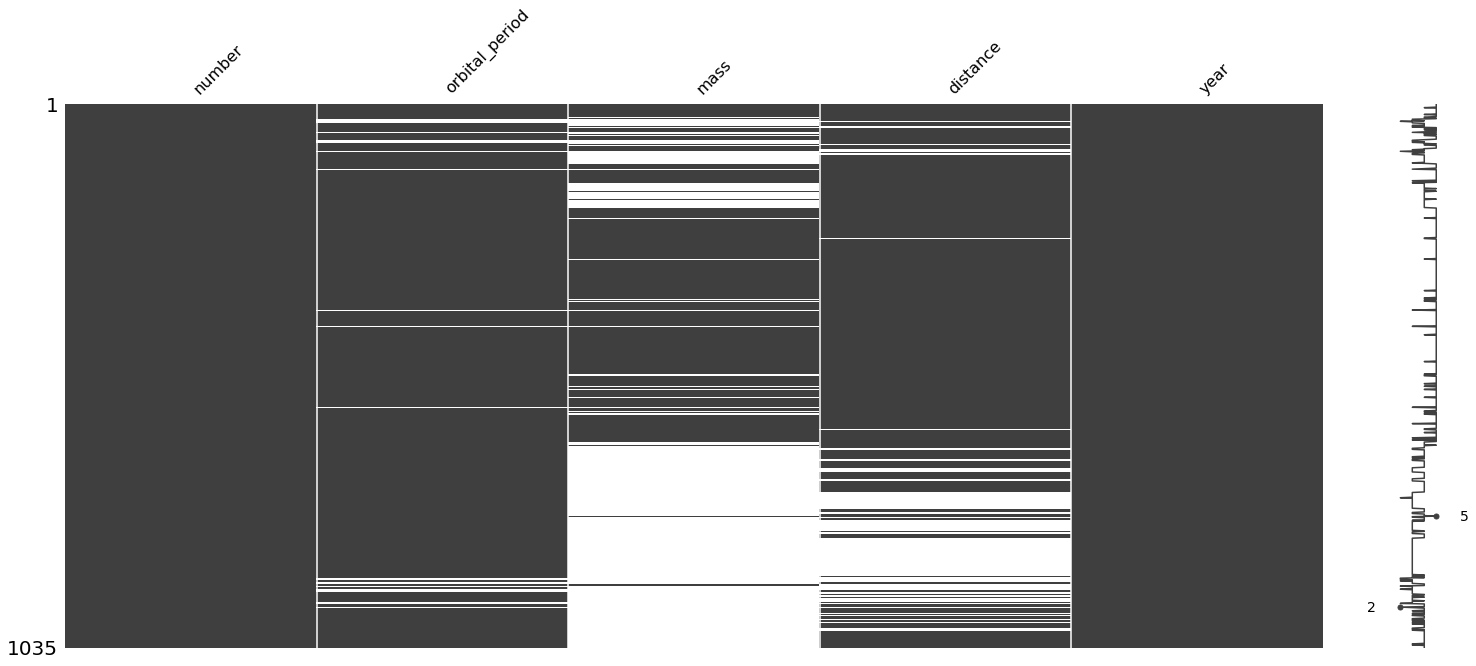

In [1]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('planets').copy()
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.isnull().sum())
msno.matrix(df);

In [2]:
!pip install fancyimpute

You should consider upgrading via the 'c:\users\dell\anaconda3\python.exe -m pip install --upgrade pip' command.


## 1-) KNN (K-Near Neighorbood) method

In [3]:
from fancyimpute import KNN

Using TensorFlow backend.


In [4]:
import pandas as pd

In [5]:
var_names=list(df)
var_names
 # we generate a list that include the names of the variables(columns)

['number', 'orbital_period', 'mass', 'distance', 'year']

In [6]:
knn_imp=KNN(k=5).fit_transform(df)


Imputing row 1/1035 with 0 missing, elapsed time: 0.178
Imputing row 101/1035 with 1 missing, elapsed time: 0.178
Imputing row 201/1035 with 0 missing, elapsed time: 0.178
Imputing row 301/1035 with 0 missing, elapsed time: 0.178
Imputing row 401/1035 with 0 missing, elapsed time: 0.178
Imputing row 501/1035 with 0 missing, elapsed time: 0.178
Imputing row 601/1035 with 0 missing, elapsed time: 0.178
Imputing row 701/1035 with 2 missing, elapsed time: 0.178
Imputing row 801/1035 with 2 missing, elapsed time: 0.194
Imputing row 901/1035 with 2 missing, elapsed time: 0.204
Imputing row 1001/1035 with 1 missing, elapsed time: 0.208


* k = 5 means tha  We filled in the missing data with the KNN method, which is a machine learning method, by considering the 5 points that are most close  for the missing values.

In [7]:
knn_imp[0:2]

array([[1.00000e+00, 2.69300e+02, 7.10000e+00, 7.74000e+01, 2.00600e+03],
       [1.00000e+00, 8.74774e+02, 2.21000e+00, 5.69500e+01, 2.00800e+03]])

In [8]:
type(knn_imp) 

numpy.ndarray

In [9]:
dff = pd.DataFrame(knn_imp)# we should convert the numpy.ndarray(df) to DATAFRAME(dff)

In [10]:
dff.head()

,0,1,2,3,4
0,1.0,269.300,7.10,77.40,2006.0
1,1.0,874.774,2.21,56.95,2008.0
2,1.0,763.000,2.60,19.84,2011.0
3,1.0,326.030,19.40,110.62,2007.0
4,1.0,516.220,10.50,119.47,2009.0


In [11]:
dff.columns = var_names # we should give the name to the columns

In [12]:
dff.head()

,number,orbital_period,mass,distance,year
0,1.0,269.300,7.10,77.40,2006.0
1,1.0,874.774,2.21,56.95,2008.0
2,1.0,763.000,2.60,19.84,2011.0
3,1.0,326.030,19.40,110.62,2007.0
4,1.0,516.220,10.50,119.47,2009.0


In [13]:
dff.isnull().sum()

number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

* As it appears, all missing data has been filled in with KNN machine learning predictive method

## 2-)EM method

This is the best method of missing data filling. Even in semi-random distributions, it is useful

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


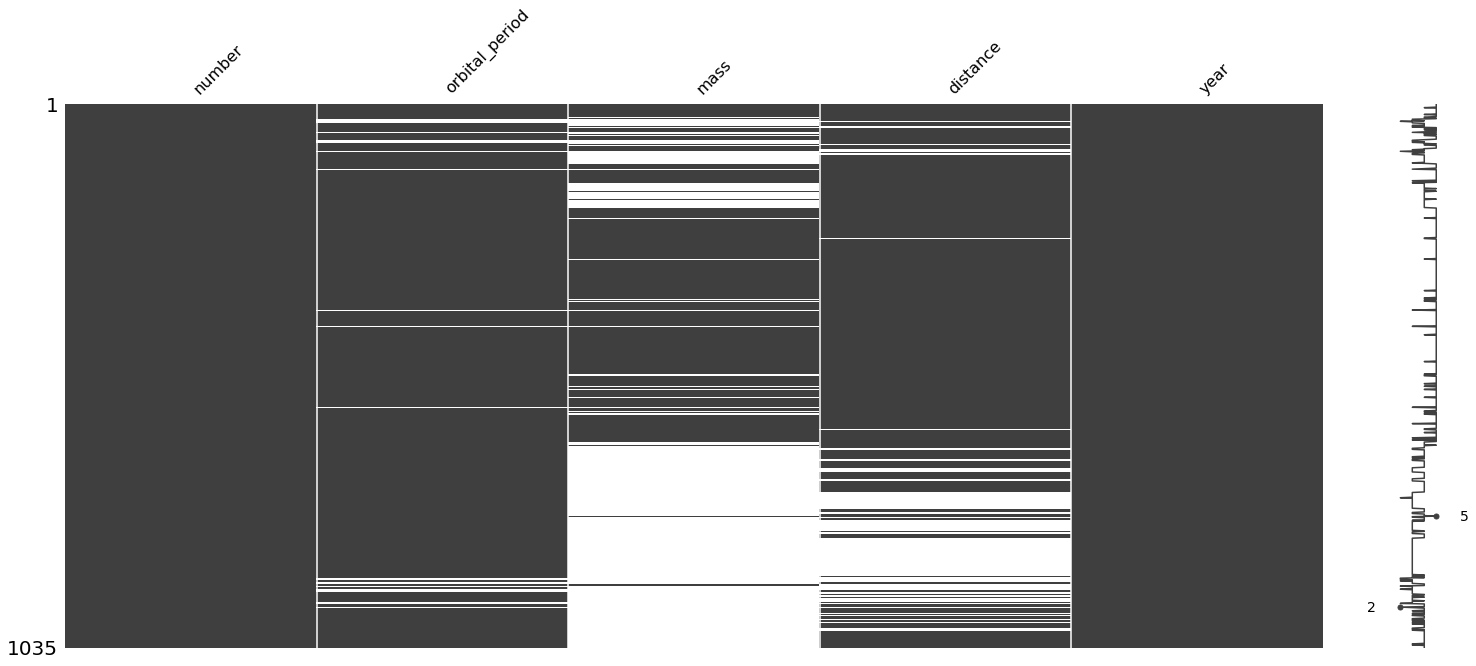

In [22]:
import seaborn as sns
import missingno as msno
df1 = sns.load_dataset('planets').copy()
df1 = df1.select_dtypes(include = ['float64', 'int64'])
print(df1.isnull().sum())
msno.matrix(df1);

In [24]:
!pip install ycimpute 

You should consider upgrading via the 'c:\users\dell\anaconda3\python.exe -m pip install --upgrade pip' command.


In [25]:
from ycimpute.imputer import EM

In [26]:
var_names = list(df1)

In [27]:
n_df1 = np.array(df1)#To use the yc impute library we need to convert the To use the yc impute library we need to convert the dataframe ourselves to a numpy array. ourselves to a numpy array.

In [29]:
n_df1.shape

(1035, 5)

In [30]:
dff1 = EM().complete(n_df1)

In [31]:
dff1= pd.DataFrame(dff1, columns = var_names)

In [32]:
dff1.head()

,number,orbital_period,mass,distance,year
0,1.0,269.300,7.10,77.40,2006.0
1,1.0,874.774,2.21,56.95,2008.0
2,1.0,763.000,2.60,19.84,2011.0
3,1.0,326.030,19.40,110.62,2007.0
4,1.0,516.220,10.50,119.47,2009.0


In [33]:
dff.isnull().sum()

number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64